Code used to help generate data and graphs. From working with the group on this exercise I would change my approach and group data more in the way from location_to_population_graph code. Keeping because it has some anaylsis used in the project

In [1]:
#dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#csv files
population_df = pd.read_csv("Illinois_Population_Pivot.csv")
census_areas = pd.read_csv("community_area_to_census.csv")

In [3]:
population_df.head()

,Name,2012,2013,2014,2015
0,"Adams, Pike, Brown, Schuyler & Mason Counties ...",112582,112391,111998,111521
1,"Cass, Morgan, Scott, Greene, Macoupin, Jersey ...",143980,143394,142662,141551
2,Champaign County--Champaign & Urbana Cities PU...,200931,202428,204214,205766
3,"Chicago City (Central)--Near North Side, Loop ...",127124,132871,136968,141554
4,"Chicago City (North)--Edgewater, Uptown & Roge...",167887,167162,164391,164412


In [4]:
census_areas.head()

,Unnamed: 0,Community,Community Number,Public Use Area
0,0,Rogers Park,1.0,"Chicago City (North)--Edgewater, Uptown & Roge..."
1,1,West Ridge,2.0,"Chicago City (North)--West Ridge, Lincoln Squa..."
2,2,Uptown,3.0,"Chicago City (North)--Edgewater, Uptown & Roge..."
3,3,Lincoln Square,4.0,"Chicago City (North)--West Ridge, Lincoln Squa..."
4,4,North Center,5.0,"Chicago City (North)--West Ridge, Lincoln Squa..."


In [5]:
#merge population to census areas
census_pop = pd.merge(census_areas, population_df, how='left', left_on="Public Use Area", right_on="Name")

In [6]:
#count values to see if any missing data
census_pop.count()

Unnamed: 0            77
Community             77
Community \nNumber    77
Public Use Area       65
Name                  65
2012                  65
2013                  65
2014                  65
2015                  65
dtype: int64

In [7]:
#drop any values where community area was not found in census data
census_pop_1 = census_pop.dropna(how="any")

In [8]:
#count values new df
census_pop_1.count()

Unnamed: 0            65
Community             65
Community \nNumber    65
Public Use Area       65
Name                  65
2012                  65
2013                  65
2014                  65
2015                  65
dtype: int64

In [9]:
#display head data
census_pop_1.head()

,Unnamed: 0,Community,Community Number,Public Use Area,Name,2012,2013,2014,2015
0,0,Rogers Park,1.0,"Chicago City (North)--Edgewater, Uptown & Roge...","Chicago City (North)--Edgewater, Uptown & Roge...",167887.0,167162.0,164391.0,164412.0
1,1,West Ridge,2.0,"Chicago City (North)--West Ridge, Lincoln Squa...","Chicago City (North)--West Ridge, Lincoln Squa...",145745.0,146506.0,147381.0,147595.0
2,2,Uptown,3.0,"Chicago City (North)--Edgewater, Uptown & Roge...","Chicago City (North)--Edgewater, Uptown & Roge...",167887.0,167162.0,164391.0,164412.0
3,3,Lincoln Square,4.0,"Chicago City (North)--West Ridge, Lincoln Squa...","Chicago City (North)--West Ridge, Lincoln Squa...",145745.0,146506.0,147381.0,147595.0
4,4,North Center,5.0,"Chicago City (North)--West Ridge, Lincoln Squa...","Chicago City (North)--West Ridge, Lincoln Squa...",145745.0,146506.0,147381.0,147595.0


In [10]:
#remove unwanted columns
census_population = census_pop_1[["Public Use Area","2012","2013","2014","2015"]]

In [11]:
#check new dataframe
census_population.head()

,Public Use Area,2012,2013,2014,2015
0,"Chicago City (North)--Edgewater, Uptown & Roge...",167887.0,167162.0,164391.0,164412.0
1,"Chicago City (North)--West Ridge, Lincoln Squa...",145745.0,146506.0,147381.0,147595.0
2,"Chicago City (North)--Edgewater, Uptown & Roge...",167887.0,167162.0,164391.0,164412.0
3,"Chicago City (North)--West Ridge, Lincoln Squa...",145745.0,146506.0,147381.0,147595.0
4,"Chicago City (North)--West Ridge, Lincoln Squa...",145745.0,146506.0,147381.0,147595.0


In [12]:
#drop multiple values, only need one public use area for this graph
census_population["Public Use Area"].value_counts()
census_population_dropped = census_population.drop_duplicates(["Public Use Area"])

In [13]:
#check dataframe
census_population_dropped.head()
census_population_dropped.reset_index(drop=True)


,Public Use Area,2012,2013,2014,2015
0,"Chicago City (North)--Edgewater, Uptown & Roge...",167887.0,167162.0,164391.0,164412.0
1,"Chicago City (North)--West Ridge, Lincoln Squa...",145745.0,146506.0,147381.0,147595.0
2,Chicago City (North)--Lake View & Lincoln Park...,161170.0,162430.0,163919.0,165171.0
3,"Chicago City (Central)--Near North Side, Loop ...",127124.0,132871.0,136968.0,141554.0
4,"Cook County (North)--Maine, Norwood Park Towns...",186023.0,186248.0,186363.0,186596.0
5,"Chicago City (Northwest)--Portage Park, Dunnin...",132505.0,133211.0,134455.0,135135.0
6,"Chicago City (Northwest)--Irving Park, Albany ...",147691.0,148787.0,145956.0,145478.0
7,"Chicago City (West)--Austin, Belmont Cragin & ...",188448.0,188559.0,191620.0,189826.0
8,"Chicago City (Northwest)--Logan Square, Avonda...",140396.0,139456.0,138008.0,139759.0
9,"Chicago City (West)--North & South Lawndale, H...",201675.0,198328.0,202175.0,202511.0


In [14]:
#sort population data alphabetically
census_population_sorted = census_population_dropped.sort_values(["Public Use Area"]).reset_index(drop=True)
census_population_sorted.head()

,Public Use Area,2012,2013,2014,2015
0,"Chicago City (Central)--Near North Side, Loop ...",127124.0,132871.0,136968.0,141554.0
1,"Chicago City (North)--Edgewater, Uptown & Roge...",167887.0,167162.0,164391.0,164412.0
2,Chicago City (North)--Lake View & Lincoln Park...,161170.0,162430.0,163919.0,165171.0
3,"Chicago City (North)--West Ridge, Lincoln Squa...",145745.0,146506.0,147381.0,147595.0
4,"Chicago City (Northwest)--Irving Park, Albany ...",147691.0,148787.0,145956.0,145478.0


Commenting out save fig because data does not show any meaningful trend this way, creating different figure at end of program


In [15]:
#define chart variables
x=np.arange(0,len(census_population_sorted["Public Use Area"]))
y1=census_population_sorted["2012"]
y2=census_population_sorted["2013"]
y3=census_population_sorted["2014"]
y4=census_population_sorted["2015"]
legend = ["2012","2013","2014","2015"]
#colors = ['darkolivegreen','olivedrab',"darkolivegreen",'cornflowerblue']

([<matplotlib.axis.XTick at 0x11b931cc0>,
 <a list of 19 Text xticklabel objects>)

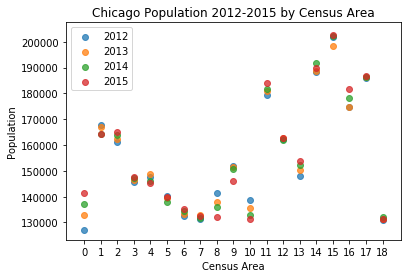

In [16]:
#graph of population over time
fig, ax = plt.subplots()
ax.scatter(x, y1, label="2012", alpha=.75)
ax.scatter(x, y2, label="2013", alpha=.75)
ax.scatter(x, y3, label="2014", alpha=.75)
ax.scatter(x, y4, label="2015", alpha=.75)


ax.legend(loc="upper left")
plt.xlabel("Census Area")
plt.ylabel("Population")
plt.title("Chicago Population 2012-2015 by Census Area")
plt.xticks(x)



In [17]:
plt.tight_layout()

<Figure size 432x288 with 0 Axes>

In [18]:
#save figure
#fig.savefig("population_over_time.png", bbox_inches="tight")

In [19]:
#calculate percentage change of poulation over time
census_population_sorted["Net Change"]=census_population_sorted.apply(lambda row: row['2015'] - row['2012'], axis=1)
census_population_sorted["Percent Change"]=census_population_sorted.apply(lambda row: row['Net Change'] / row['2012']*100, axis=1)

In [20]:
#find last row to add total to
census_population_sorted.tail()

,Public Use Area,2012,2013,2014,2015,Net Change,Percent Change
14,"Chicago City (West)--Austin, Belmont Cragin & ...",188448.0,188559.0,191620.0,189826.0,1378.0,0.731236
15,"Chicago City (West)--North & South Lawndale, H...",201675.0,198328.0,202175.0,202511.0,836.0,0.414528
16,"Chicago City (West)--West Town, Near West Side...",174815.0,174862.0,178197.0,181760.0,6945.0,3.972771
17,"Cook County (North)--Maine, Norwood Park Towns...",186023.0,186248.0,186363.0,186596.0,573.0,0.308026
18,"Cook County (West)--Leyden, Norwood Park (Sout...",130954.0,131303.0,132059.0,131409.0,455.0,0.347450


In [21]:
#Total population
census_population_sorted.loc[19,'Public Use Area']="Population All of Chicago"
census_population_sorted.loc[19,"2012"] = census_population_sorted["2012"].sum()
census_population_sorted.loc[19,"2013"] = census_population_sorted["2013"].sum()
census_population_sorted.loc[19,"2014"] = census_population_sorted["2014"].sum()
census_population_sorted.loc[19,"2015"] = census_population_sorted["2015"].sum()
census_population_sorted.loc[19,"Net Change"] = census_population_sorted.loc[19,"2015"]-census_population_sorted.loc[19,"2012"]
census_population_sorted.loc[19,"Percent Change"] = census_population_sorted.loc[19,"Net Change"]/census_population_sorted.loc[19,'2012']

In [22]:
#check changes
census_population_sorted.tail()

,Public Use Area,2012,2013,2014,2015,Net Change,Percent Change
15,"Chicago City (West)--North & South Lawndale, H...",201675.0,198328.0,202175.0,202511.0,836.0,0.414528
16,"Chicago City (West)--West Town, Near West Side...",174815.0,174862.0,178197.0,181760.0,6945.0,3.972771
17,"Cook County (North)--Maine, Norwood Park Towns...",186023.0,186248.0,186363.0,186596.0,573.0,0.308026
18,"Cook County (West)--Leyden, Norwood Park (Sout...",130954.0,131303.0,132059.0,131409.0,455.0,0.347450
19,Population All of Chicago,2957146.0,2961767.0,2968979.0,2974031.0,16885.0,0.005710


In [23]:
#format percent column and display table
census_population_sorted["Percent Change"] = census_population_sorted["Percent Change"].map("{:,.2f}%".format)
census_population_sorted.head()

,Public Use Area,2012,2013,2014,2015,Net Change,Percent Change
0,"Chicago City (Central)--Near North Side, Loop ...",127124.0,132871.0,136968.0,141554.0,14430.0,11.35%
1,"Chicago City (North)--Edgewater, Uptown & Roge...",167887.0,167162.0,164391.0,164412.0,-3475.0,-2.07%
2,Chicago City (North)--Lake View & Lincoln Park...,161170.0,162430.0,163919.0,165171.0,4001.0,2.48%
3,"Chicago City (North)--West Ridge, Lincoln Squa...",145745.0,146506.0,147381.0,147595.0,1850.0,1.27%
4,"Chicago City (Northwest)--Irving Park, Albany ...",147691.0,148787.0,145956.0,145478.0,-2213.0,-1.50%


In [24]:
#sort by Net Change, do not reset the index so numbers match the graph
census_population_percent = census_population_sorted.sort_values(["Net Change"])

In [25]:
#top five
census_population_percent.head()

,Public Use Area,2012,2013,2014,2015,Net Change,Percent Change
8,"Chicago City (South)--Auburn Gresham, Roseland...",141288.0,138115.0,136087.0,132120.0,-9168.0,-6.49%
10,"Chicago City (South)--South Chicago, Pullman, ...",138811.0,135733.0,132887.0,131432.0,-7379.0,-5.32%
9,"Chicago City (South)--Chicago Lawn, Englewood/...",151798.0,151395.0,150711.0,146174.0,-5624.0,-3.70%
1,"Chicago City (North)--Edgewater, Uptown & Roge...",167887.0,167162.0,164391.0,164412.0,-3475.0,-2.07%
4,"Chicago City (Northwest)--Irving Park, Albany ...",147691.0,148787.0,145956.0,145478.0,-2213.0,-1.50%


In [26]:
#bottom five
census_population_percent.tail()

,Public Use Area,2012,2013,2014,2015,Net Change,Percent Change
11,"Chicago City (South)--South Shore, Hyde Park, ...",179284.0,180854.0,181813.0,184128.0,4844.0,2.70%
13,"Chicago City (Southwest)--Gage Park, Garfield ...",148078.0,150404.0,152218.0,153737.0,5659.0,3.82%
16,"Chicago City (West)--West Town, Near West Side...",174815.0,174862.0,178197.0,181760.0,6945.0,3.97%
0,"Chicago City (Central)--Near North Side, Loop ...",127124.0,132871.0,136968.0,141554.0,14430.0,11.35%
19,Population All of Chicago,2957146.0,2961767.0,2968979.0,2974031.0,16885.0,0.01%


In [27]:
#finding names of top/bottom three areas to add to power point
census_population_percent.loc[10,'Public Use Area']

'Chicago City (South)--South Chicago, Pullman, West Pullman, East Side & South Deering PUMA; Illinois'

In [ ]:
#Will be using the census areas with the largest and smallest population changes to look at crime rate
#collecting variables to use in crime_rate_by_census_area_population.ipynb
#locs = [8,10,9,0,16,13]